# **1. Perkenalan Dataset**


Data didapatkan dari [Kaggle: Credit Score Classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) Dataset ini memiliki 100.000 Data dengan 27 Fitur, bertujuan untuk mengklasifikasikan nilai credit dari customer.

# **2. Import Library**

In [1]:
import re
from collections import Counter

from typing import Tuple, Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [2]:
#Type your code here
raw_data = pd.read_csv('../Credit Score Dataset.csv')
raw_data.info()

/tmp/ipykernel_210415/789602288.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../Credit Score Dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [3]:
raw_data.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# **4. Exploratory Data Analysis (EDA)**


## Data Cleaning

### Informasi Awal Dataset

Saat melakukan `pd.read_csv('../Credit Score Dataset.csv')`, muncul peringatan:
```
DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
```
Artinya, pada kolom **Monthly_Balance (kolom ke-26)**, terdapat tipe data campuran (misalnya angka dan string sekaligus). Pandas memberi peringatan karena hal ini dapat menyebabkan inkonsistensi saat pengolahan data.

---

### Ringkasan Struktur DataFrame

Hasil `raw_data.info()` menunjukkan:

- Jumlah baris: **100.000 entri**
- Jumlah kolom: **28 fitur**
- Terdapat kombinasi tipe data:
  - **object (20 kolom)** → biasanya berisi string, tetapi bisa saja ada angka yang salah dibaca sebagai teks.
  - **int64 (4 kolom)**
  - **float64 (4 kolom)**

Beberapa kolom memiliki missing values, misalnya:
- `Name` hanya terisi 90.015 baris
- `Monthly_Inhand_Salary` hanya terisi 84.998 baris
- `Num_of_Delayed_Payment` hanya terisi 92.998 baris
- dll.

---

### Kolom Object yang Diduga Numerik

Hasil pengecekan menunjukkan bahwa ada **8 kolom bertipe `object`** yang sebenarnya berisi data numerik:

- `Age`  
- `Annual_Income`  
- `Num_of_Loan`  
- `Num_of_Delayed_Payment`  
- `Changed_Credit_Limit`  
- `Outstanding_Debt`  
- `Amount_invested_monthly`  
- `Monthly_Balance`

Kolom-kolom ini sebaiknya dikonversi ke tipe numerik (`int` atau `float`) agar bisa diproses dengan benar dalam analisis maupun pemodelan.

---

### Catatan Penting

Informasi ini baru sebatas **gambaran awal**:
- Perlu dicek ulang apakah tipe data setiap kolom sudah sesuai.  
- Perlu ditangani nilai yang hilang, anomali, atau kesalahan input.  
- Langkah berikutnya adalah melakukan **data cleaning** dan **konversi tipe data** untuk menyiapkan dataset sebelum analisis lebih lanjut.m

In [4]:
# cek kolom bertipe object
object_cols = raw_data.select_dtypes(include="object").columns

# coba konversi tiap kolom object ke numerik (pakai coercion)
suspect_numeric = []
for col in object_cols:
    converted = pd.to_numeric(raw_data[col], errors="coerce")
    # kalau ada nilai yang bisa diubah jadi angka (bukan semuanya NaN), kemungkinan besar kolom ini numerik
    if converted.notna().sum() > 0 and converted.notna().sum() < len(raw_data):
        suspect_numeric.append(col)

print("Kolom object yang kemungkinan seharusnya numerik:")
print(suspect_numeric)


Kolom object yang kemungkinan seharusnya numerik:
['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']


In [5]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Age"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Age"]
print(invalid_values)

raw_data["Age"] = (
    raw_data["Age"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # buang semua kecuali angka dan titik
    .astype(int)
)

raw_data["Age"].head()


8          28_
54         34_
58         30_
71         24_
89         33_
         ...  
99908    4808_
99922      38_
99933      38_
99942      48_
99987      28_
Name: Age, Length: 4939, dtype: object


0     23
1     23
2    500
3     23
4     23
Name: Age, dtype: int64

In [6]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Annual_Income"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Annual_Income"]
print(invalid_values)

raw_data["Annual_Income"] = (
    raw_data["Annual_Income"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # buang semua kecuali angka dan titik
    .astype(float)
)

raw_data["Annual_Income"].head()

10        34847.84_
27        30689.89_
32        35547.71_
56        34081.38_
66       114838.41_
            ...    
99959     38321.39_
99974     16680.35_
99981      37188.1_
99993     39628.99_
99999     39628.99_
Name: Annual_Income, Length: 6980, dtype: object


0    19114.12
1    19114.12
2    19114.12
3    19114.12
4    19114.12
Name: Annual_Income, dtype: float64

In [7]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Num_of_Loan"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Num_of_Loan"]
print(invalid_values)

raw_data["Num_of_Loan"] = (
    raw_data["Num_of_Loan"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # buang semua kecuali angka dan titik
    .astype(int)
)

raw_data["Num_of_Loan"].head()


37       0_
80       3_
84       3_
94       2_
119      5_
         ..
99918    4_
99937    0_
99940    0_
99958    4_
99984    5_
Name: Num_of_Loan, Length: 4785, dtype: object


0    4
1    4
2    4
3    4
4    4
Name: Num_of_Loan, dtype: int64

In [8]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Num_of_Delayed_Payment"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Num_of_Delayed_Payment"]
print(invalid_values)

raw_data["Num_of_Delayed_Payment"] = pd.to_numeric(
    raw_data["Num_of_Delayed_Payment"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Num_of_Delayed_Payment"].head()


1        NaN
4        NaN
6         8_
11        3_
30       NaN
        ... 
99973    NaN
99974    NaN
99992    NaN
99993    NaN
99998    NaN
Name: Num_of_Delayed_Payment, Length: 9746, dtype: object


0    7.0
1    NaN
2    7.0
3    4.0
4    NaN
Name: Num_of_Delayed_Payment, dtype: float64

In [9]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Changed_Credit_Limit"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Changed_Credit_Limit"]
print(invalid_values)

raw_data["Changed_Credit_Limit"] = pd.to_numeric(
    raw_data["Changed_Credit_Limit"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Changed_Credit_Limit"].head()


2        _
65       _
66       _
109      _
110      _
        ..
99548    _
99618    _
99800    _
99892    _
99931    _
Name: Changed_Credit_Limit, Length: 2091, dtype: object


0    11.27
1    11.27
2      NaN
3     6.27
4    11.27
Name: Changed_Credit_Limit, dtype: float64

In [10]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Outstanding_Debt"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Outstanding_Debt"]
print(invalid_values)

raw_data["Outstanding_Debt"] = pd.to_numeric(
    raw_data["Outstanding_Debt"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Outstanding_Debt"].head()


87       1328.93_
142      1283.37_
368      2797.17_
632      3818.57_
703       343.84_
           ...   
99842     1095.9_
99862    1350.85_
99930    1453.61_
99984     3571.7_
99985     3571.7_
Name: Outstanding_Debt, Length: 1009, dtype: object


0    809.98
1    809.98
2    809.98
3    809.98
4    809.98
Name: Outstanding_Debt, dtype: float64

In [11]:
col = raw_data["Credit_History_Age"]

# Regex fleksibel (case-insensitive)
pat = (
    r"(?i)^\s*"
    r"(?:(\d+)\s*(?:years?|yrs?|yr|tahun|thn))?\s*"
    r"(?:and|&|,)?\s*"
    r"(?:(\d+)\s*(?:months?|mos?|mo|bulan|bln))?\s*$"
)

ext = col.astype(str).str.extract(pat)  # dua kolom: [years, months]

yrs = pd.to_numeric(ext[0], errors="coerce")
mos = pd.to_numeric(ext[1], errors="coerce")

total_months = yrs.fillna(0) * 12 + mos.fillna(0)

# Baris yang benar-benar tidak ter-parse (dua-duanya NaN) jadikan NaN
mask_unparsed = yrs.isna() & mos.isna()
total_months = total_months.astype("Float64")
total_months[mask_unparsed] = pd.NA

raw_data["Credit_History_Age_Months"] = total_months

print(raw_data["Credit_History_Age_Months"].head())
print("Jumlah gagal parse:", mask_unparsed.sum())
print(raw_data.loc[mask_unparsed, "Credit_History_Age"].dropna().unique()[:20])

# Hitung missing di kolom asli
print("Missing asli:", raw_data["Credit_History_Age"].isna().sum())

# Cek contoh entri yang gagal parse (tanpa dropna)
print(raw_data.loc[mask_unparsed, "Credit_History_Age"].head(20))

raw_data = raw_data.drop("Credit_History_Age", axis=1)

0    265.0
1     <NA>
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age_Months, dtype: Float64
Jumlah gagal parse: 9030
[]
Missing asli: 9030
1      NaN
7      NaN
19     NaN
40     NaN
42     NaN
45     NaN
56     NaN
72     NaN
77     NaN
87     NaN
110    NaN
117    NaN
131    NaN
133    NaN
154    NaN
156    NaN
181    NaN
182    NaN
190    NaN
192    NaN
Name: Credit_History_Age, dtype: object


In [12]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Amount_invested_monthly"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Amount_invested_monthly"]
print(invalid_values)

raw_data["Amount_invested_monthly"] = pd.to_numeric(
    raw_data["Amount_invested_monthly"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Amount_invested_monthly"].head()


18       __10000__
23       __10000__
28       __10000__
60             NaN
61             NaN
           ...    
99925          NaN
99951    __10000__
99961          NaN
99973    __10000__
99974          NaN
Name: Amount_invested_monthly, Length: 8784, dtype: object


0     80.415295
1    118.280222
2     81.699521
3    199.458074
4     41.420153
Name: Amount_invested_monthly, dtype: float64

In [13]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Monthly_Balance"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Monthly_Balance"]
print(invalid_values)

raw_data["Monthly_Balance"] = pd.to_numeric(
    raw_data["Monthly_Balance"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Monthly_Balance"].head()


197      NaN
314      NaN
388      NaN
456      NaN
457      NaN
        ... 
99820    NaN
99839    NaN
99852    NaN
99854    NaN
99927    NaN
Name: Monthly_Balance, Length: 1209, dtype: object


0    312.494089
1    284.629162
2    331.209863
3    223.451310
4    341.489231
Name: Monthly_Balance, dtype: float64

### Analisis Distribusi Variabel Kategorikal

Hasil `value_counts()` untuk variabel kategorikal menunjukkan pola distribusi serta adanya beberapa kejanggalan pada data.

---

#### 1. **ID**
- Total unique: **100.000**
- Setiap nilai ID bersifat unik, sesuai harapan (identifikasi baris).  
- Tidak relevan untuk analisis model, lebih berfungsi sebagai identifier.

---

#### 2. **Customer_ID**
- Total unique: **12.500**
- Setiap Customer_ID muncul **8 kali**.  
- Artinya dataset ini **longitudinal**, yaitu setiap nasabah memiliki catatan pada beberapa periode waktu (multi-month records).

---

#### 3. **Month**
- Terdistribusi merata: **Januari – Agustus, masing-masing 12.500**.  
- Menunjukkan data mencakup periode 8 bulan dengan proporsi seimbang.

---

#### 4. **Name**
- Total unique: **10.139**
- Ada beberapa nama berulang (misalnya *Stevex*, *Langep*), tetapi relatif jarang.  
- Nama bukan fitur informatif untuk analisis kredit → lebih ke noise.

---

#### 5. **SSN**
- Total unique: **12.501**
- Ada nilai aneh: `#F%$D@*&8` muncul **5572 kali**.  
- Indikasi **placeholder/error input** yang seharusnya `NaN` (missing value).  
- Sisanya berupa SSN unik dengan sedikit duplikasi.

---

#### 6. **Occupation**
- Distribusi cukup merata di 15 kategori (misalnya Lawyer, Architect, Engineer, dll).  
- Fitur ini **valid dan informatif**.

---

#### 7. **Type_of_Loan**
- Total unique: **6.260** → sangat tinggi.  
- Terdapat nilai tunggal (misalnya *Credit-Builder Loan*, *Student Loan*), tetapi juga kombinasi kategori seperti *Personal Loan, and Student Loan*.  
- **Kesimpulan:** Kolom ini seharusnya merupakan **multi-choice kategori** (satu customer bisa punya lebih dari satu jenis pinjaman), tetapi ditulis dalam satu kolom string.  
- Perlu dilakukan **preprocessing → split menjadi multiple columns (one-hot encoding)** atau **multi-label encoding**.

---

#### 8. **Credit_Mix**
- Nilai utama: *Standard*, *Good*, *Bad*.  
- Ada kategori `_` yang jelas merupakan **missing value** yang tidak ditangani dengan benar.

---

#### 9. **Payment_of_Min_Amount**
- Kategori valid: *Yes*, *No*.  
- Ada nilai tambahan *NM*, kemungkinan besar merupakan **missing value** yang disimpan sebagai string.

---

#### 10. **Payment_Behaviour**
- Distribusi utama terdiri dari enam kategori logis (gabungan pola pengeluaran dan pembayaran).  
- Namun, terdapat nilai tidak valid: `!@9#%8`, yang merupakan **error input**.

---

#### 11. **Credit_Score**
- Tiga kategori utama: *Standard (53%)*, *Poor (29%)*, *Good (18%)*.  
- Distribusi terlihat masuk akal, tidak ada nilai aneh.

---

### Kesimpulan Awal
1. Beberapa kolom kategorikal berisi **nilai error/placeholder** yang seharusnya dianggap **missing value**, contoh:  
   - `_` pada `Credit_Mix`  
   - `NM` pada `Payment_of_Min_Amount`  
   - `!@9#%8` pada `Payment_Behaviour`  
   - `#F%$D@*&8` pada `SSN`  

2. **Kolom `Type_of_Loan` bermasalah secara struktural**:  
   - Nilai seharusnya berupa **daftar pinjaman** (multi-label).  
   - Saat ini ditulis sebagai string tunggal dengan gabungan kategori.  
   - Perlu dilakukan parsing lebih lanjut sebelum digunakan dalam analisis.

3. Secara umum, distribusi kategori cukup konsisten, tetapi diperlukan **data cleaning intensif** untuk memperbaiki nilai error dan menstrukturkan ulang fitur kompleks.


In [14]:
# pilih kolom kategorikal
cat_cols = raw_data.select_dtypes(include=["object"])

# Univariate Analysis untuk variabel kategorikal dengan print value_counts
for col in cat_cols.columns:
    print(f"\n=== Distribusi Kategori: {col} ===")
    unique_count = raw_data[col].nunique()

    if unique_count <= 20:
        # kategori sedikit → tampilkan semua
        print(raw_data[col].value_counts())
    else:
        # kategori terlalu banyak → tampilkan top 10
        print(raw_data[col].value_counts().head(10))
        print(f"... total unique: {unique_count}")


=== Distribusi Kategori: ID ===
ID
0x1602    1
0x1603    1
0x1604    1
0x1605    1
0x1606    1
0x1607    1
0x1608    1
0x1609    1
0x160e    1
0x160f    1
Name: count, dtype: int64
... total unique: 100000

=== Distribusi Kategori: Customer_ID ===
Customer_ID
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
CUS_0x1cdb    8
CUS_0x95ee    8
CUS_0x284a    8
CUS_0x5407    8
CUS_0x4157    8
CUS_0xba08    8
Name: count, dtype: int64
... total unique: 12500

=== Distribusi Kategori: Month ===
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

=== Distribusi Kategori: Name ===
Name
Stevex                44
Langep                44
Vaughanl              39
Jessicad              39
Deepa Seetharamanm    38
Raymondr              38
Jessica Wohlt         38
Danielz               38
Lucia Mutikanip       37
Nicko                 37
Name: count, dtype: int64
.

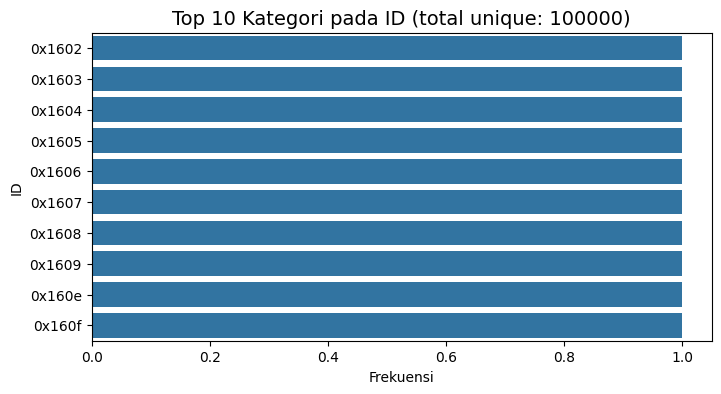

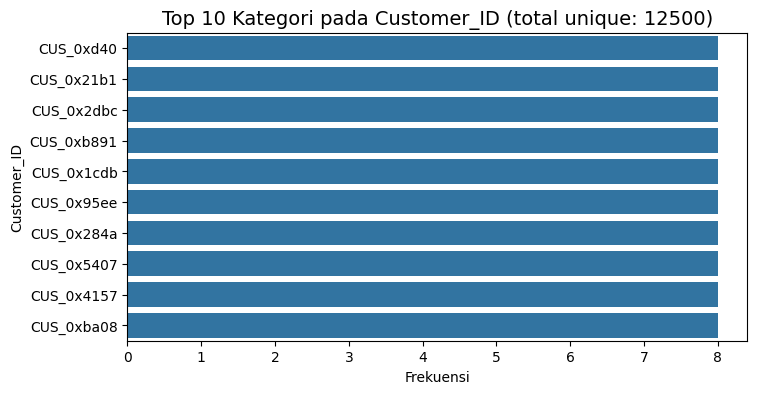

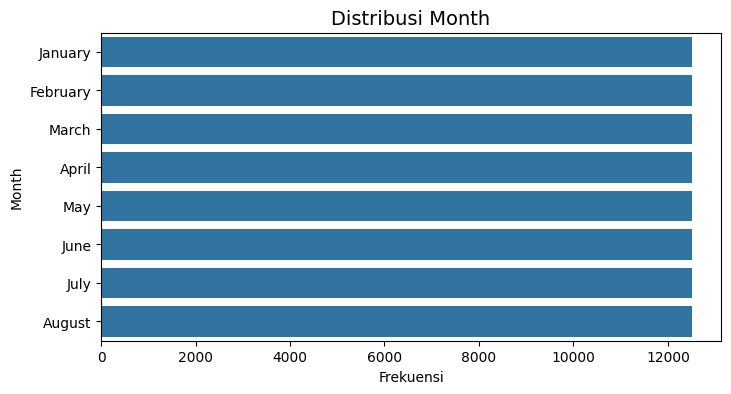

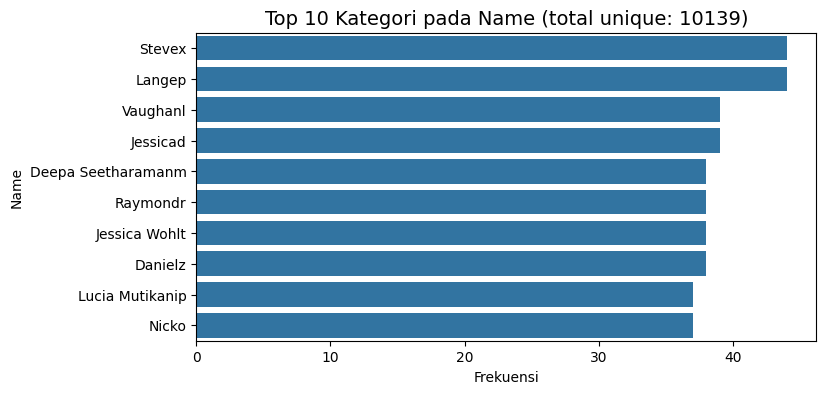

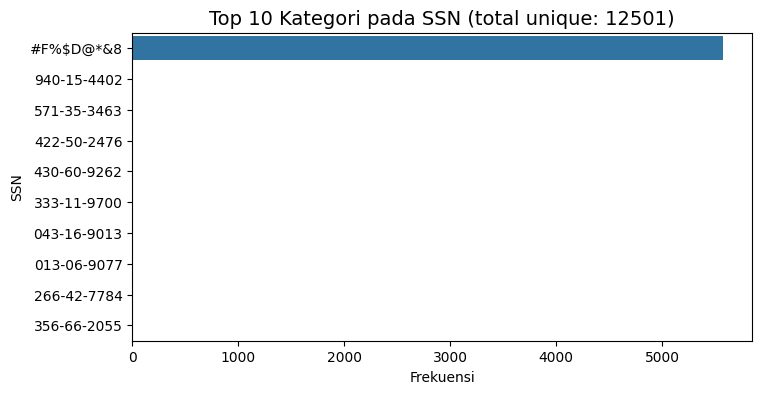

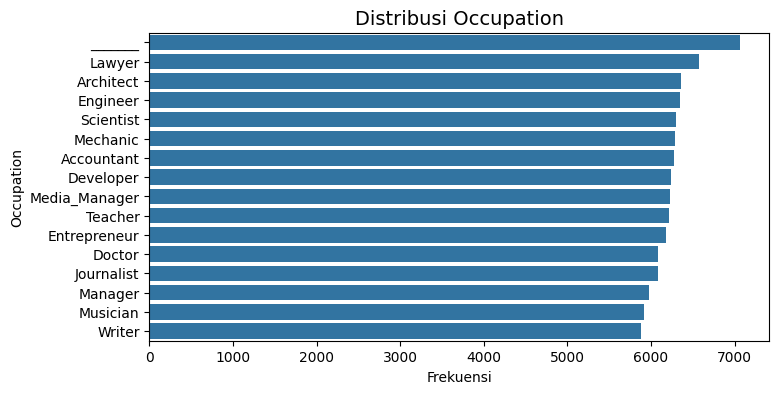

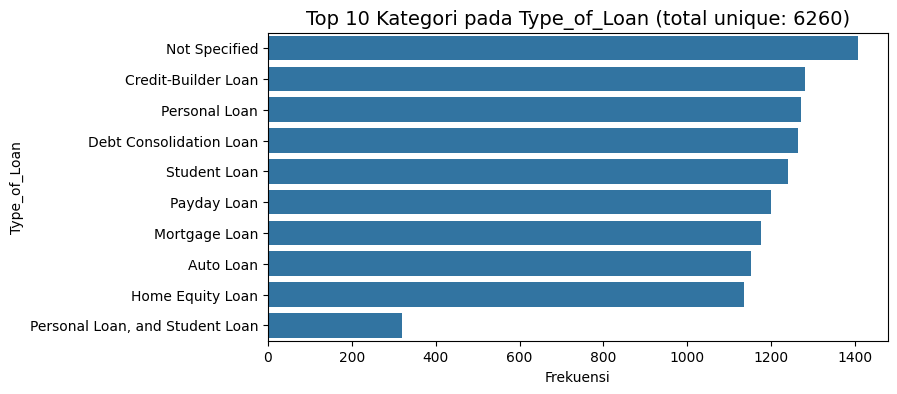

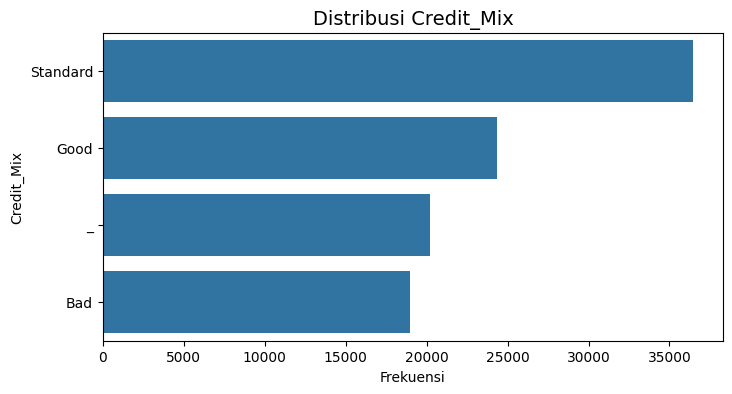

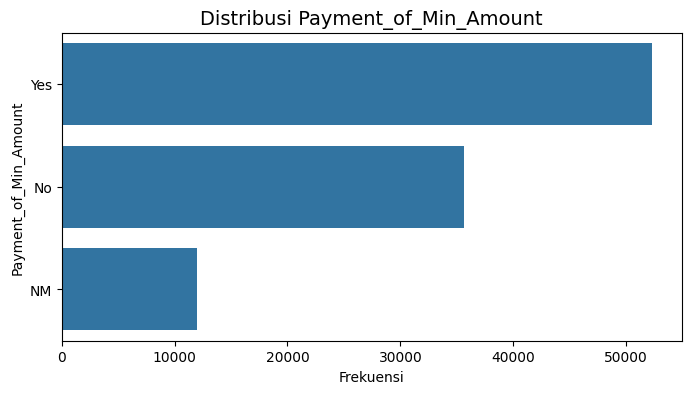

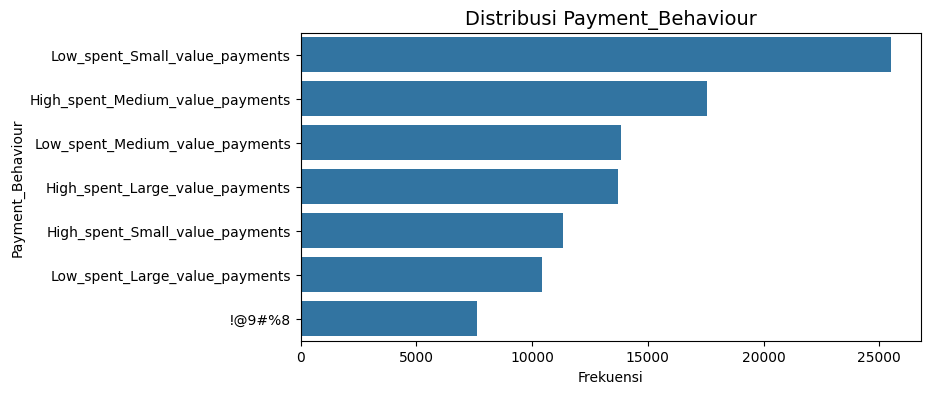

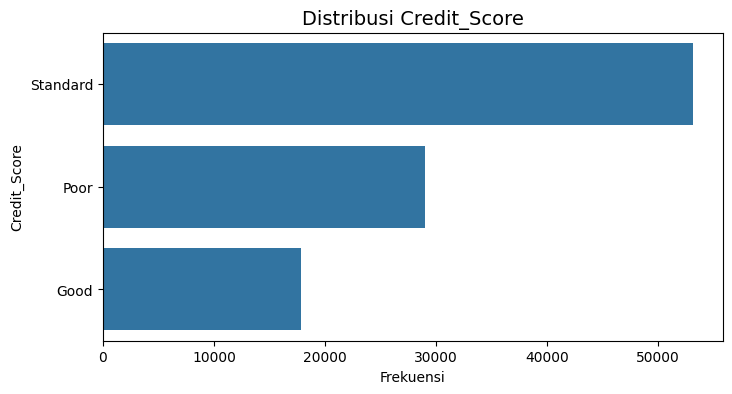

In [15]:
# Univariate Analysis untuk variabel kategorikal dengan pendekatan adaptif
for col in cat_cols.columns:
    unique_count = raw_data[col].nunique()
    plt.figure(figsize=(8, 4))

    if unique_count <= 20:
        # kategori sedikit → countplot normal
        sns.countplot(y=raw_data[col], order=raw_data[col].value_counts().index)
        plt.title(f"Distribusi {col}", fontsize=14)
        plt.xlabel("Frekuensi")
        plt.ylabel(col)
    else:
        # kategori terlalu banyak → tampilkan top 10
        top_values = raw_data[col].value_counts().head(10)
        sns.barplot(x=top_values.values, y=top_values.index)
        plt.title(
            f"Top 10 Kategori pada {col} (total unique: {unique_count})", fontsize=14
        )
        plt.xlabel("Frekuensi")
        plt.ylabel(col)

    plt.show()


In [16]:
print(raw_data['Occupation'].value_counts())
raw_data["Occupation"] = raw_data["Occupation"].replace("_______", np.nan)
print(raw_data["Occupation"].value_counts())

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [17]:
print(raw_data['Credit_Mix'].value_counts())
raw_data["Credit_Mix"] = raw_data["Credit_Mix"].replace("_", np.nan)
print(raw_data["Credit_Mix"].value_counts())

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64
Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64


In [18]:
COL = "Type_of_Loan"

# 1) Normalisasi separator
SEP_RE = re.compile(r"\s*(?:,|&|and)\s*", flags=re.I)


def split_tokens(x):
    if pd.isna(x):
        return []
    return [
        t.strip(" ,").strip() for t in SEP_RE.split(str(x)) if t.strip(" ,").strip()
    ]


# 2) Hitung token mentah (untuk audit)
raw_lists = raw_data[COL].apply(split_tokens)

# ---- Audit penyebab Unknown ----
# a) hanya Not Specified / kosong
only_ns = raw_lists.apply(
    lambda lst: len(lst) > 0
    and all(s.lower() in {"not specified", "n/a", "na"} for s in lst)
)
empty_or_ns = raw_data[COL].isna() | only_ns
print("Hanya 'Not Specified' / NaN:", int(empty_or_ns.sum()))

cnt = Counter()
for lst in raw_lists.dropna():
    cnt.update([s.lower() for s in lst if s])
print("Top 30 tokens mentah:")
print(pd.Series(dict(cnt.most_common(30))))

# 3) Kamus pola → label kanonis (ditambah alias umum)
PATTERNS = [
    (r"credit[\s-]*builder", "Credit-Builder Loan"),
    (r"\bpersonal\b|\bcons?umer\b|\bline of credit\b", "Personal Loan"),
    (r"debt\s*consol|consolidation", "Debt Consolidation Loan"),
    (r"\bstudent\b|education", "Student Loan"),
    (r"\bpay\s*day\b|\bcash\s*advance\b", "Payday Loan"),
    (r"\bmort(gage)?\b|\bhome\s*loan\b", "Mortgage Loan"),
    (r"\bauto\b|\bcar\b|\bvehicle\b", "Auto Loan"),
    (r"home\s*equity", "Home Equity Loan"),
]
CANON = [lab for _, lab in PATTERNS]
NOISE = {"not specified", "n/a", "na", "", "-", "--"}


def map_row(lst):
    mapped, had_unknown = set(), False
    if not lst:
        return [], True
    for tok in lst:
        low = tok.lower()
        if low in NOISE:
            continue
        hit = None
        for pat, canon in PATTERNS:
            if re.search(pat, low, flags=re.I):
                hit = canon
                break
        if hit is None:
            had_unknown = True
        else:
            mapped.add(hit)
    if not mapped:
        had_unknown = True
    return sorted(mapped), had_unknown


mapped = raw_lists.apply(map_row)
loan_lists = mapped.apply(lambda x: x[0])
unknown_flag = mapped.apply(lambda x: x[1]).astype(int)


# 4) Bangun multi-hot untuk 8 label
def slug(s):
    return re.sub(r"[^A-Za-z0-9]+", "_", s).strip("_")


created = []
for lab in CANON:
    coln = f"Loan_{slug(lab)}"
    raw_data[coln] = loan_lists.apply(lambda L: int(lab in L))
    created.append(coln)

raw_data["Loan_Unknown"] = unknown_flag

print("\nCreated:", created + ["Loan_Unknown"])
print("Unknown rows (baru):", int(raw_data["Loan_Unknown"].sum()))

# 5) Lihat contoh baris yang masih unknown tetapi tidak kosong/Not Specified
mask_unknown_nonempty = (raw_data["Loan_Unknown"] == 1) & (~empty_or_ns)
sample = raw_data.loc[mask_unknown_nonempty, COL].head(20)
print("\nContoh unknown non-empty (cek apakah perlu tambah alias lagi):")
print(sample.to_string(index=False))

raw_data = raw_data.drop('Type_of_Loan', axis=1)


Hanya 'Not Specified' / NaN: 12968
Top 30 tokens mentah:
payday loan                40568
credit-builder loan        40440
not specified              39616
home equity loan           39104
student loan               38968
mortgage loan              38936
personal loan              38888
debt consolidation loan    38776
auto loan                  37992
dtype: int64

Created: ['Loan_Credit_Builder_Loan', 'Loan_Personal_Loan', 'Loan_Debt_Consolidation_Loan', 'Loan_Student_Loan', 'Loan_Payday_Loan', 'Loan_Mortgage_Loan', 'Loan_Auto_Loan', 'Loan_Home_Equity_Loan', 'Loan_Unknown']
Unknown rows (baru): 12968

Contoh unknown non-empty (cek apakah perlu tambah alias lagi):
Series([], )


In [19]:
print(raw_data["Payment_of_Min_Amount"].value_counts())
raw_data["Payment_of_Min_Amount"] = raw_data["Payment_of_Min_Amount"].replace("NM", np.nan)
print(raw_data["Payment_of_Min_Amount"].value_counts())


Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64
Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64


In [20]:
print(raw_data["Payment_Behaviour"].value_counts())
raw_data["Payment_Behaviour"] = raw_data["Payment_Behaviour"].replace("!@9#%8", np.nan)
print(raw_data["Payment_Behaviour"].value_counts())


Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64


### Statistik Deskriptif Dataset

Hasil `DataFrame.describe()` pada fitur numerik memberikan gambaran awal tentang distribusi nilai setiap kolom. Beberapa poin penting:

---

#### 1. Nilai Ekstrem (Outliers / Kemungkinan Salah Input)
- **Age**: nilai maksimum mencapai **8698 tahun**, jelas tidak realistis.  
- **Annual_Income**: nilai maksimum hingga **24 juta**, sementara mayoritas pendapatan jauh lebih rendah.  
- **Num_Bank_Accounts**: ada hingga **1798 akun bank**, padahal wajar hanya beberapa saja.  
- **Num_Credit_Card**: hingga **1499 kartu kredit**, kemungkinan salah input.  
- **Interest_Rate**: mencapai **5797%**, tidak masuk akal.  
- **Num_of_Loan**: hingga **1496 pinjaman**, sangat tidak realistis.  
- **Num_of_Delayed_Payment**: ada nilai ekstrim sampai **4397 kali**, kemungkinan error pencatatan.  
- **Monthly_Balance**: nilai maksimum **3.33e+26**, jelas salah input atau error parsing data.

---

#### 2. Distribusi Tidak Wajar
- Beberapa kolom menunjukkan **standar deviasi sangat tinggi** (contoh: `Annual_Income`, `Num_Credit_Inquiries`, `Total_EMI_per_month`), menandakan adanya data yang melenceng jauh dari pusat distribusi.  
- Sebagian besar kolom terkait jumlah akun, kartu kredit, dan pinjaman menunjukkan nilai rata-rata wajar di kisaran rendah, tetapi nilai maksimum jauh terlalu besar → indikasi anomali.

---

#### 3. Kolom Bernilai Biner
Kolom seperti:
- `Loan_Credit_Builder_Loan`  
- `Loan_Personal_Loan`  
- `Loan_Debt_Consolidation_Loan`  
- `Loan_Student_Loan`  
- `Loan_Payday_Loan`  
- `Loan_Mortgage_Loan`  
- `Loan_Auto_Loan`  
- `Loan_Home_Equity_Loan`  
- `Loan_Unknown`  

Mayoritas bernilai 0 atau 1, sesuai dengan indikator kepemilikan jenis pinjaman tertentu. Distribusi ini terlihat konsisten.

---

### Kesimpulan Awal
Statistik deskriptif ini memperlihatkan bahwa dataset mengandung **banyak nilai ekstrem dan kemungkinan salah input**, terutama pada fitur usia, pendapatan, jumlah akun/kartu/pinjaman, bunga, serta saldo bulanan.  
Langkah penting berikutnya adalah melakukan:
- **Deteksi dan penanganan outlier**  
- **Pembersihan data (data cleaning)**  
- **Validasi logika bisnis** (misalnya usia manusia tidak bisa lebih dari 120, kartu kredit jarang lebih dari puluhan, dsb.)



In [21]:
num_cols = raw_data.select_dtypes(include=["int64", "float64"])
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.5097,684.757313,14.0,25.0,34.0,42.0,8698.0
Annual_Income,100000.0,176415.701298,1429618.051414,7005.93,19457.5,37578.61,72790.92,24198062.0
Monthly_Inhand_Salary,84998.0,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,100000.0,22.47443,129.05741,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,100000.0,72.46604,466.422621,1.0,8.0,13.0,20.0,5797.0
Num_of_Loan,100000.0,10.76196,61.789933,0.0,2.0,3.0,6.0,1496.0
Delay_from_due_date,100000.0,21.06878,14.860104,-5.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,92998.0,30.946268,226.028754,0.0,9.0,14.0,18.0,4397.0
Changed_Credit_Limit,97909.0,10.465678,6.670732,0.0,5.35,9.4,14.87,36.97


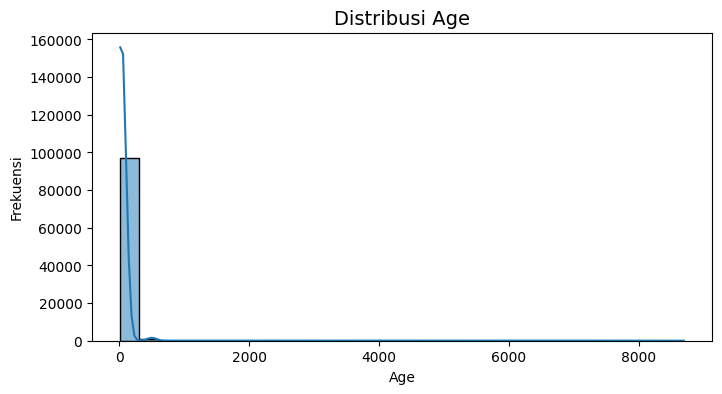

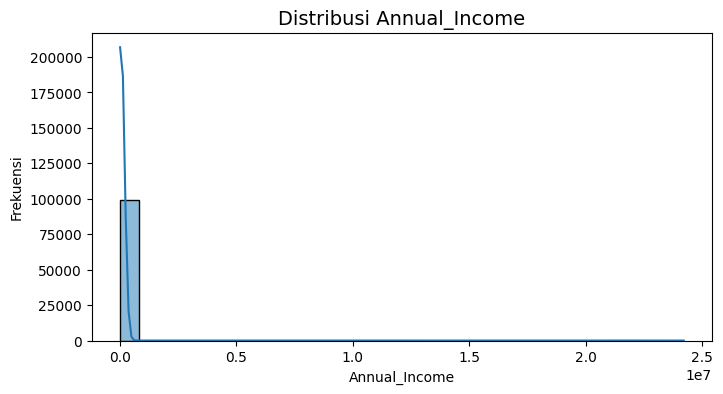

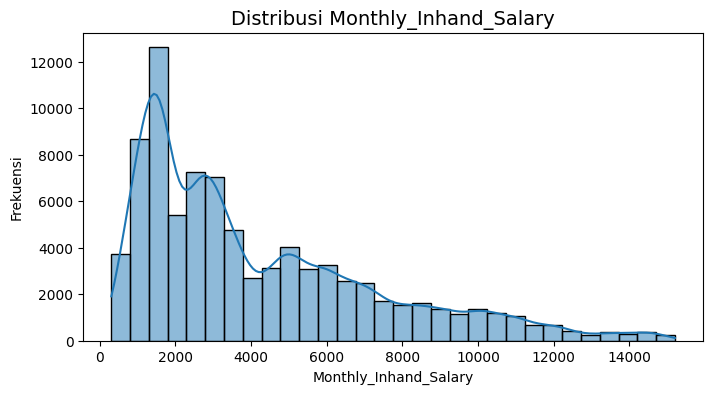

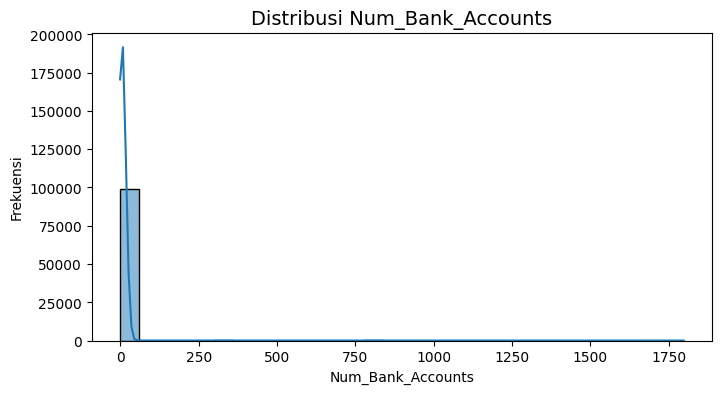

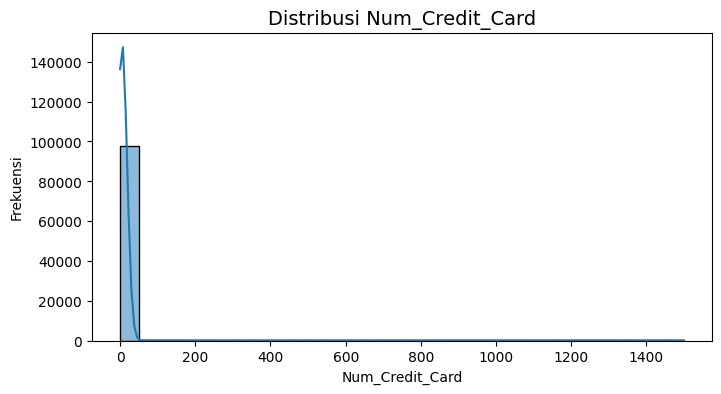

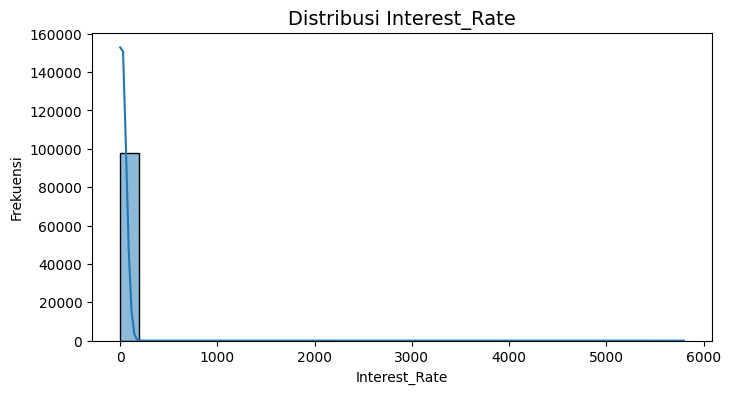

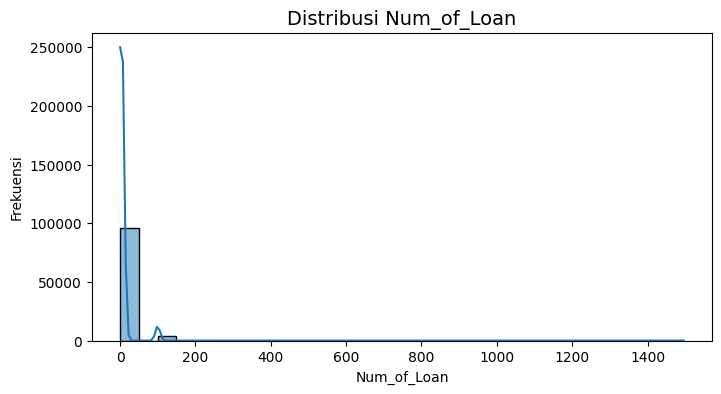

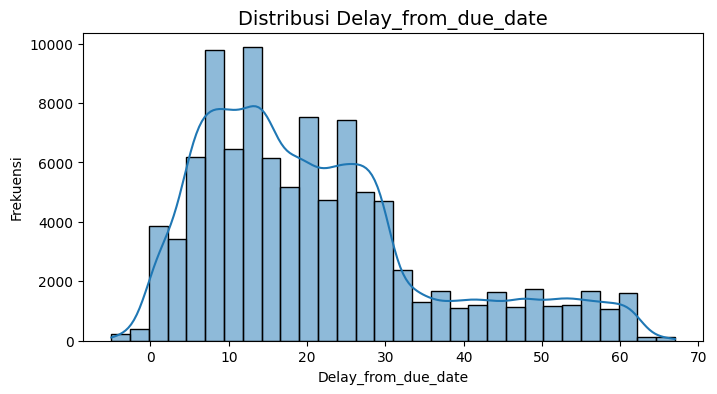

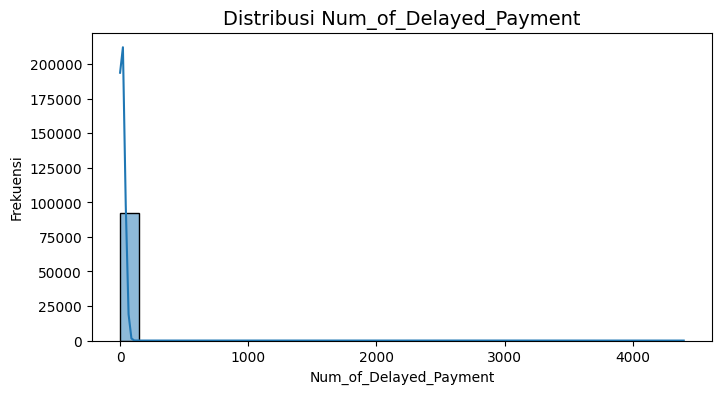

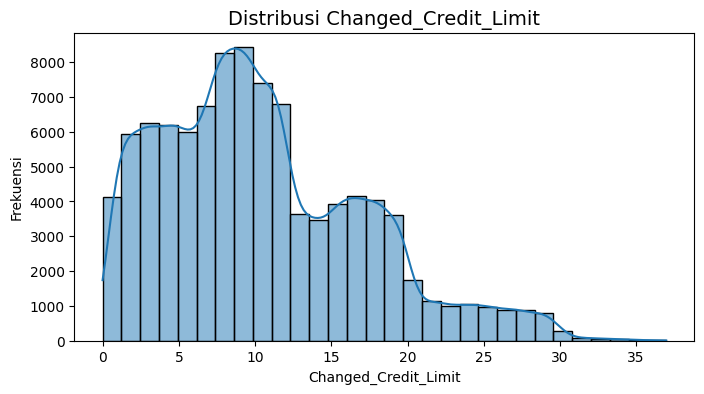

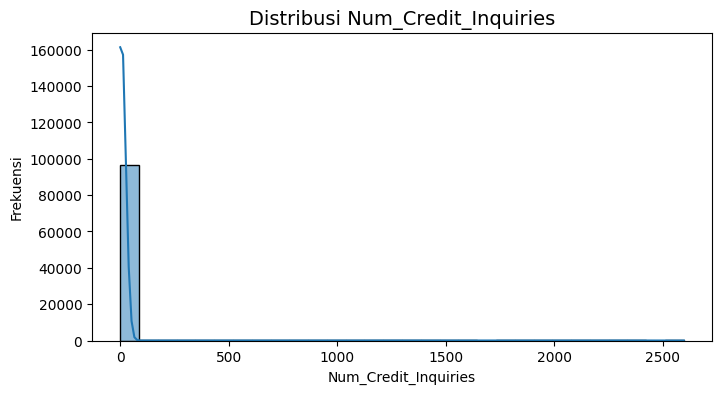

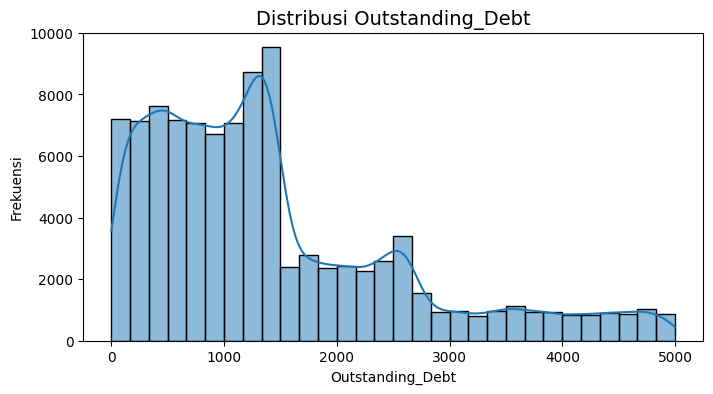

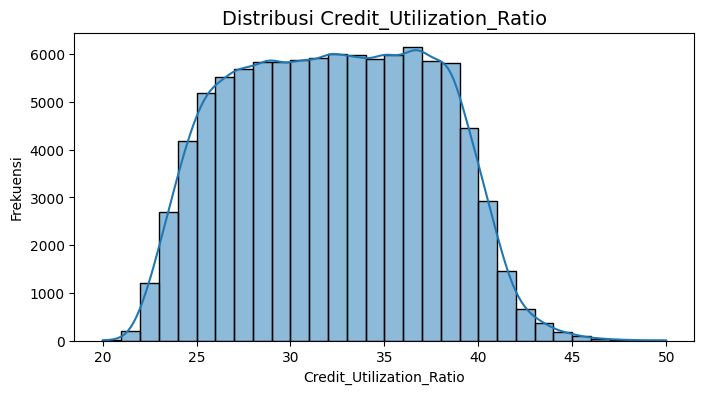

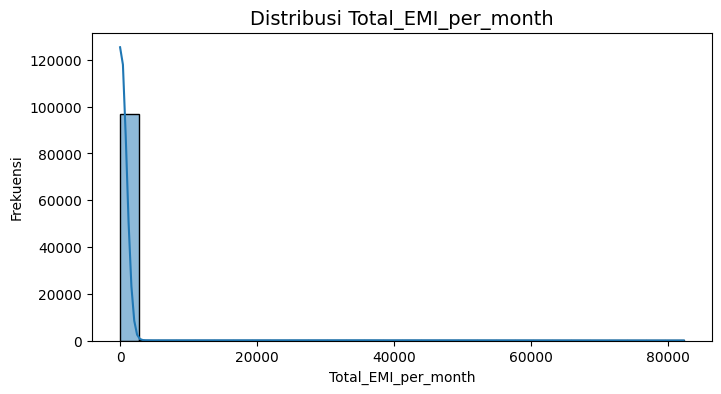

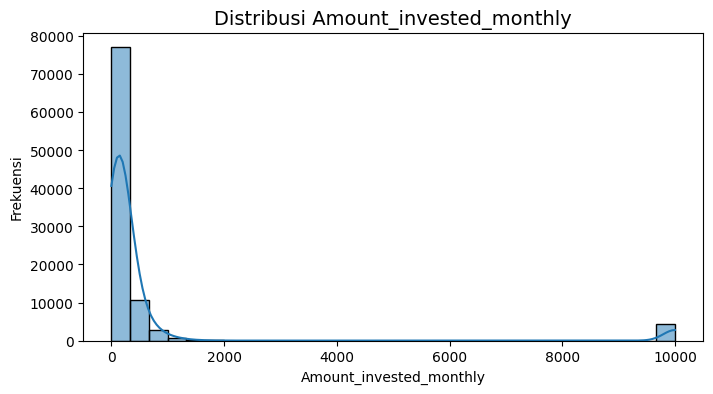

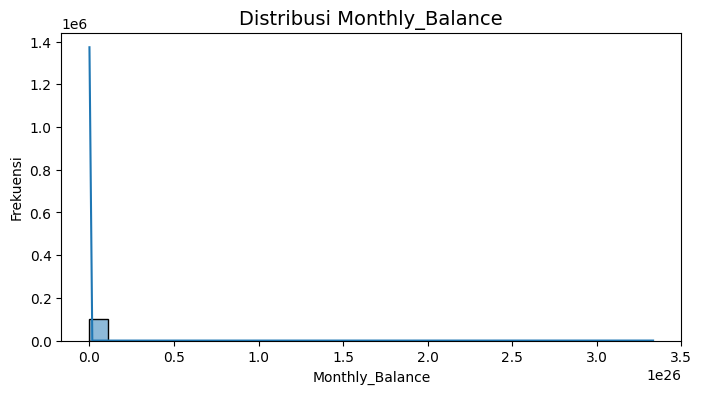

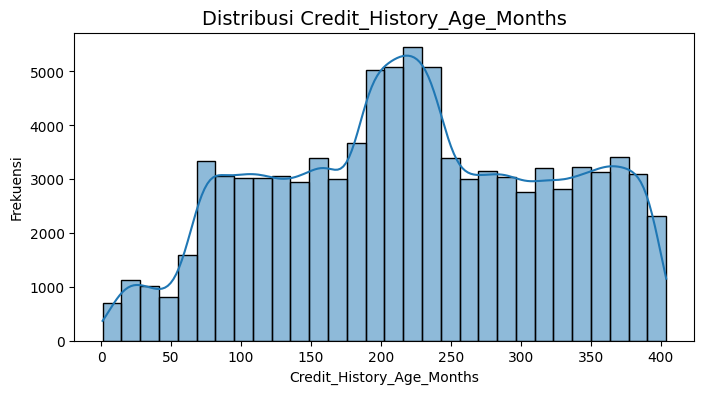

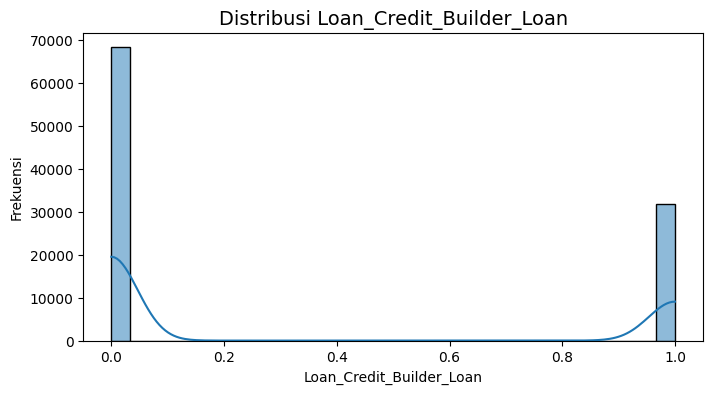

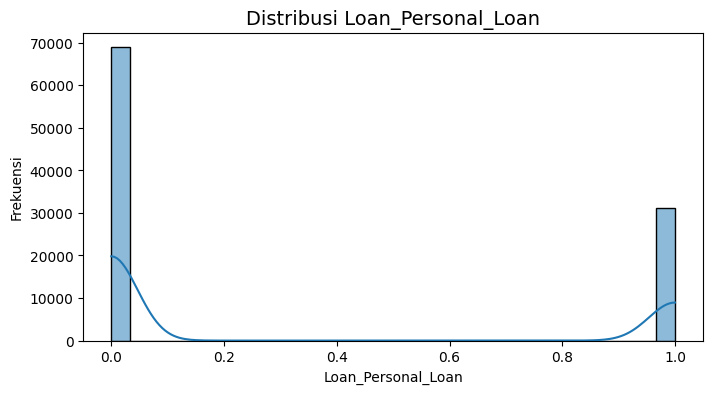

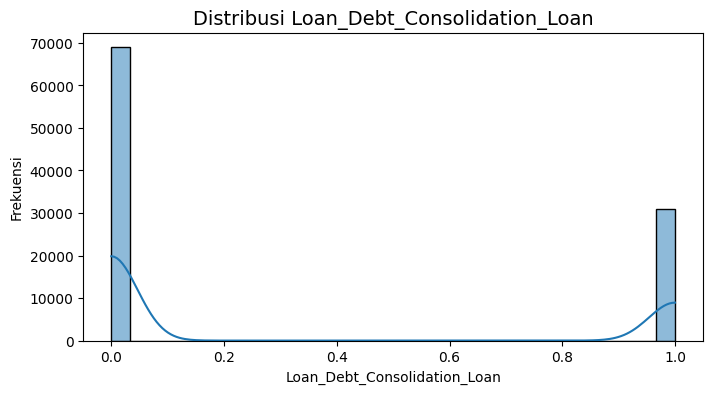

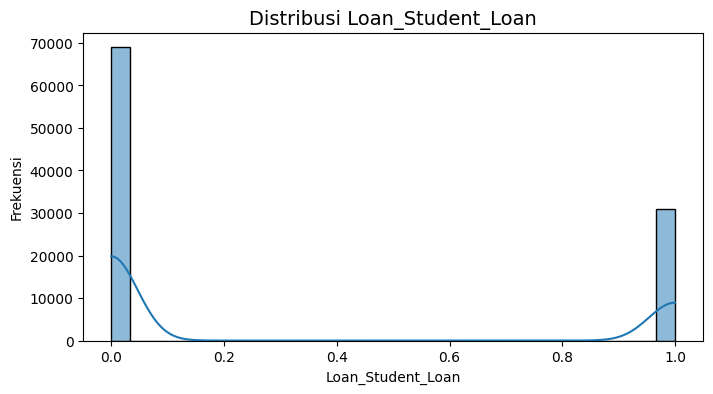

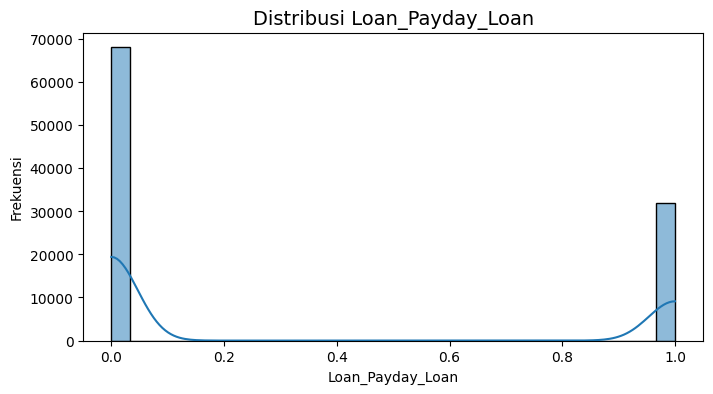

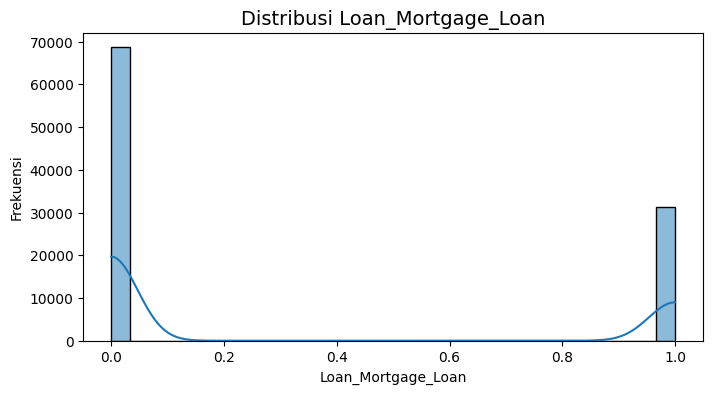

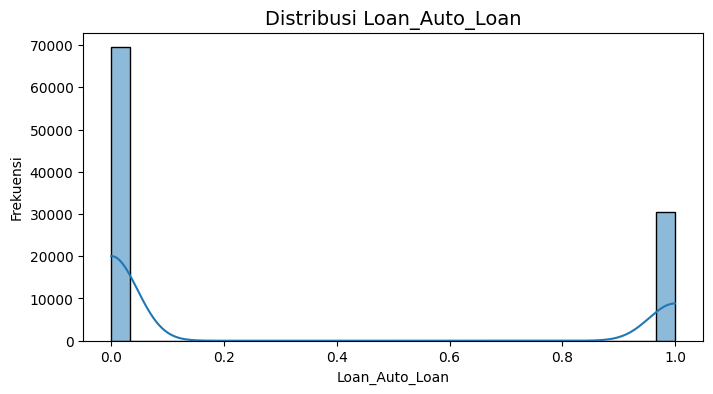

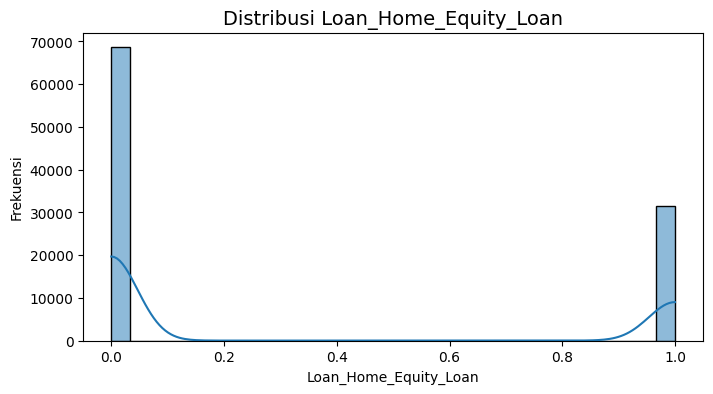

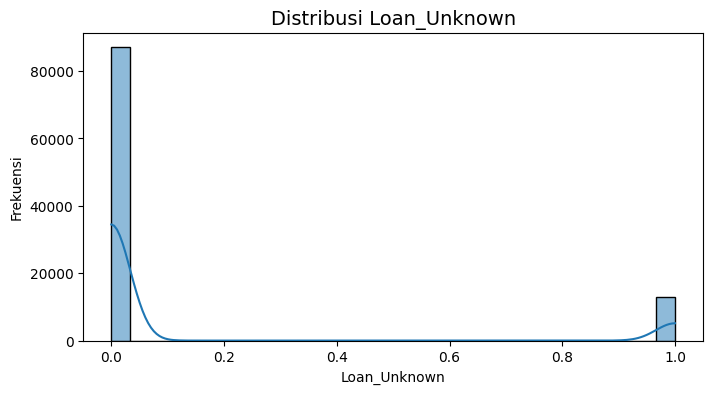

In [22]:
# Univariate Analysis untuk variabel numerik
for col in num_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(raw_data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribusi {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

In [23]:
def clip_invalid(
    s: pd.Series, rules: Tuple[Optional[int | float], Optional[int | float]]
) -> pd.Series:
    """
    Ubah nilai di luar [lo, hi] menjadi NaN untuk Series tunggal.

    Parameters
    ----------
    s : pd.Series
        Data kolom tunggal.
    rules : tuple (lo, hi)
        Batas bawah dan atas. Gunakan None untuk skip salah satu.
        Contoh: (0, 10), (None, 100), (18, None)
    """
    s = s.copy()
    lo, hi = rules
    if lo is not None:
        s.loc[s < lo] = np.nan
    if hi is not None:
        s.loc[s > hi] = np.nan
    return s


In [24]:
print("Age", raw_data["Age"].quantile(0.95))
print("Annual_Income", raw_data["Annual_Income"].quantile(0.99))
print("Num_Bank_Accounts", raw_data["Num_Bank_Accounts"].quantile(0.97))
print("Num_Credit_Card", raw_data["Num_Credit_Card"].quantile(0.97))
print("Interest_Rate", raw_data["Interest_Rate"].quantile(0.97))
print("Num_of_Loan", raw_data["Num_of_Loan"].quantile(0.95))
print("Num_of_Delayed_Payment", raw_data["Num_of_Delayed_Payment"].quantile(0.99))
print("Num_Credit_Inquiries", raw_data["Num_Credit_Inquiries"].quantile(0.98))
print("Total_EMI_per_month", raw_data["Total_EMI_per_month"].quantile(0.96))
print("Amount_invested_monthly", raw_data["Amount_invested_monthly"].quantile(0.95))
print("Monthly_Balance", raw_data["Monthly_Balance"].quantile(0.9999))

raw_data["Age"] = clip_invalid(raw_data["Age"], (1, 70))
raw_data["Annual_Income"] = clip_invalid(raw_data["Annual_Income"], (1, 200000))
raw_data["Num_Bank_Accounts"] = clip_invalid(raw_data["Num_Bank_Accounts"], (1, 10))
raw_data["Num_Credit_Card"] = clip_invalid(raw_data["Num_Credit_Card"], (1, 10))
raw_data["Interest_Rate"] = clip_invalid(raw_data["Interest_Rate"], (0, 100))
raw_data["Num_of_Loan"] = clip_invalid(raw_data["Num_of_Loan"], (1, 10))
raw_data["Num_of_Delayed_Payment"] = clip_invalid(
    raw_data["Num_of_Delayed_Payment"], (1, 30)
)
raw_data["Num_Credit_Inquiries"] = clip_invalid(
    raw_data["Num_Credit_Inquiries"], (1, 30)
)
raw_data["Total_EMI_per_month"] = clip_invalid(
    raw_data["Total_EMI_per_month"], (0, 900)
)
raw_data["Amount_invested_monthly"] = clip_invalid(
    raw_data["Amount_invested_monthly"], (0, 1500)
)
raw_data["Monthly_Balance"] = clip_invalid(raw_data["Monthly_Balance"], (0, 2000))


Age 54.0
Annual_Income 179987.28
Num_Bank_Accounts 10.0
Num_Credit_Card 10.0
Interest_Rate 34.0
Num_of_Loan 9.0
Num_of_Delayed_Payment 27.0
Num_Credit_Inquiries 16.0
Total_EMI_per_month 611.2866937353463
Amount_invested_monthly 1149.4057853186484
Monthly_Balance 1579.3817006179677


# **5. Data Preprocessing**

### Penghapusan Kolom ID, Customer_ID, Name, dan SSN

Beberapa kolom dihapus dari dataset karena **tidak relevan atau berpotensi menimbulkan noise** pada analisis maupun pemodelan:

- **ID**  
  - Bersifat unik untuk setiap baris.  
  - Hanya berfungsi sebagai identifier teknis, tidak mengandung informasi yang bisa memengaruhi credit score.  

- **Customer_ID**  
  - Identitas unik untuk nasabah.  
  - Muncul berulang sesuai periode (longitudinal records).  
  - Tidak memiliki hubungan langsung dengan perilaku kredit, sehingga lebih tepat digunakan untuk *tracking*, bukan sebagai fitur model.  

- **Name**  
  - Data pribadi yang tidak relevan dalam penilaian kredit.  
  - Bisa menimbulkan isu privasi dan tidak punya nilai prediktif.  

- **SSN**  
  - Identitas sensitif yang sebaiknya tidak digunakan untuk analisis.  
  - Selain isu privasi, distribusi data juga menunjukkan adanya nilai error/placeholder (`#F%$D@*&8`).  
  - Tidak relevan untuk pemodelan, karena nomor SSN tidak menggambarkan perilaku finansial.

---

### Kesimpulan
Kolom-kolom ini dihapus karena:
1. **Tidak informatif** untuk analisis credit score.  
2. **Hanya berfungsi sebagai identifier** (bukan prediktor).  
3. **Mengandung data sensitif** (Name, SSN) → lebih aman dibuang.  

Dengan demikian, dataset menjadi lebih bersih dan fokus pada fitur yang benar-benar berhubungan dengan risiko kredit.
m

In [25]:
raw_data = raw_data.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1)


### Analisis Variabel Kategorikal (Setelah Pembersihan)

Distribusi kategori setelah dilakukan pembersihan data:

- **Month**  
  - Terdiri dari 8 kategori (Januari – Agustus), masing-masing dengan jumlah data **12.500**.  
  - Tidak ada nilai hilang atau kategori aneh.  

- **Occupation**  
  - 15 kategori pekerjaan yang cukup merata penyebarannya.  
  - Semua kategori valid dan tidak ditemukan placeholder/error.  

- **Credit_Mix**  
  - 3 kategori utama: *Standard*, *Good*, *Bad*.  
  - Tidak ada lagi nilai `_` yang sebelumnya merupakan missing value.  

- **Payment_of_Min_Amount**  
  - 2 kategori: *Yes* dan *No*.  
  - Nilai *NM* yang semula muncul telah dibersihkan, sehingga tidak ada lagi noise.  

- **Payment_Behaviour**  
  - 6 kategori yang menggambarkan kombinasi pola belanja dan pembayaran.  
  - Nilai tidak valid (*!@9#%8*) sudah dihapus/dikonversi ke NaN, sehingga hanya kategori sah yang tersisa.  

- **Credit_Score**  
  - 3 kategori utama: *Standard*, *Poor*, *Good*.  
  - Distribusi terlihat konsisten, tidak ada nilai error.  

---

### Catatan Penting untuk Preprocessing
- Setelah pembersihan, **tidak ada lagi nilai yang seharusnya `NaN` tetapi disimpan sebagai string/error**.  
- Karena model yang akan digunakan adalah **gradient boosting populer** (misalnya XGBoost, LightGBM, atau CatBoost), semua variabel kategorikal ini **cukup dikonversi dengan `astype('category')`**.  
- Model-model tersebut dapat menangani fitur kategorikal secara otomatis tanpa perlu dilakukan *one-hot encoding* manual.  

Dengan langkah ini, dataset menjadi lebih efisien dan siap dipakai pada tahap pemodelan.

In [26]:
# pilih kolom kategorikal
cat_cols = raw_data.select_dtypes(include=["object"])

# Univariate Analysis untuk variabel kategorikal dengan print value_counts
for col in cat_cols.columns:
    print(f"\n=== Distribusi Kategori: {col} ===")
    unique_count = raw_data[col].nunique()

    if unique_count <= 20:
        # kategori sedikit → tampilkan semua
        print(raw_data[col].value_counts())
    else:
        # kategori terlalu banyak → tampilkan top 10
        print(raw_data[col].value_counts().head(10))
        print(f"... total unique: {unique_count}")

raw_data[cat_cols.columns] = raw_data[cat_cols.columns].astype("category")


=== Distribusi Kategori: Month ===
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

=== Distribusi Kategori: Occupation ===
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

=== Distribusi Kategori: Credit_Mix ===
Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

=== Distribusi Kategori: Payment_of_Min_Amount ===
Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64

=== Distribusi Kategori: Payment_Behaviour ===
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Med

### Statistik Deskriptif Setelah Cleaning

Setelah dilakukan pembersihan data (outlier handling, perbaikan tipe data, dan penanganan missing values), ringkasan statistik menjadi lebih masuk akal:

- **Age**: Rata-rata usia nasabah sekitar **33 tahun** dengan rentang 14–56, jauh lebih realistis dibandingkan nilai ekstrim sebelumnya (hingga ribuan tahun).  
- **Annual_Income**: Rata-rata pendapatan tahunan sekitar **50 ribu**, dengan batas maksimum ~180 ribu. Distribusi jauh lebih masuk akal dibandingkan sebelumnya yang mencapai jutaan.  
- **Monthly_Inhand_Salary**: Rata-rata gaji bersih bulanan sekitar **4.194** dengan rentang yang wajar (300–15.200).  
- **Num_Bank_Accounts** dan **Num_Credit_Card**: Distribusi masuk akal, mayoritas berada di rentang 1–10.  
- **Interest_Rate**: Rata-rata bunga ~14.5%, dengan variasi hingga 100%, masih dalam batas wajar untuk data simulasi kredit.  
- **Num_of_Loan**: Rata-rata sekitar 4 pinjaman, maksimum 9.  
- **Outstanding_Debt**, **Total_EMI_per_month**, dan **Monthly_Balance** menunjukkan distribusi yang lebih realistis setelah cleaning.  
- **Credit_History_Age_Months**: Median usia histori kredit sekitar **219 bulan (~18 tahun)**, dengan maksimum 404 bulan (~33 tahun).  

Untuk fitur pinjaman (Loan_*), hasil distribusi berbentuk biner (0/1) sudah sesuai ekspektasi.

---

### Skewness pada Fitur Numerik

Analisis skewness (kemiringan distribusi) menunjukkan beberapa kolom memiliki skewness yang cukup tinggi:

- **Annual_Income (1.13)**  
- **Monthly_Inhand_Salary (1.12)**  
- **Outstanding_Debt (1.20)**  
- **Total_EMI_per_month (2.12)**  
- **Amount_invested_monthly (2.41)**  
- **Monthly_Balance (1.59)**  
- **Loan_Unknown (2.20)**  

Skewness > 1 mengindikasikan distribusi yang sangat miring ke kanan (*right-skewed*), sehingga bisa menyulitkan algoritma pembelajaran.

---

### Langkah Preprocessing Lanjutan

- Kolom-kolom dengan **skewness tinggi** akan dilakukan **normalisasi menggunakan transformasi Yeo-Johnson**.  
- Transformasi ini fleksibel (bisa menangani data bernilai nol maupun negatif, berbeda dengan log transform) sehingga lebih aman untuk data finansial.  
- Tujuannya adalah membuat distribusi fitur menjadi lebih simetris agar model **LightGBM (LGBM)** dapat belajar lebih efektif, meningkatkan stabilitas dan akurasi prediksi.



In [27]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,97219.0,33.320009,10.769558,14.0,24.0,33.0,42.0,56.0
Annual_Income,99001.0,50497.576053,38296.622971,7005.93,19344.27,36993.94,71676.0,179987.28
Monthly_Inhand_Salary,84998.0,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,94327.0,5.614787,2.375655,1.0,4.0,6.0,7.0,10.0
Num_Credit_Card,97680.0,5.532043,2.06457,1.0,4.0,5.0,7.0,10.0
Interest_Rate,97988.0,14.546679,8.798523,1.0,7.0,13.0,20.0,100.0
Num_of_Loan,84722.0,3.989648,2.223318,1.0,2.0,4.0,6.0,9.0
Delay_from_due_date,100000.0,21.06878,14.860104,-5.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,90653.0,13.574245,6.058713,1.0,9.0,14.0,18.0,28.0
Changed_Credit_Limit,97909.0,10.465678,6.670732,0.0,5.35,9.4,14.87,36.97


In [28]:
raw_data.select_dtypes(include="number").skew()

Age                             0.155527
Annual_Income                   1.130942
Monthly_Inhand_Salary           1.127272
Num_Bank_Accounts              -0.040052
Num_Credit_Card                 0.225652
Interest_Rate                   0.592513
Num_of_Loan                     0.565116
Delay_from_due_date             0.966395
Num_of_Delayed_Payment          -0.12751
Changed_Credit_Limit            0.726421
Num_Credit_Inquiries            0.463929
Outstanding_Debt                1.207536
Credit_Utilization_Ratio        0.028617
Total_EMI_per_month             2.127556
Amount_invested_monthly         2.410187
Monthly_Balance                 1.596536
Credit_History_Age_Months      -0.048234
Loan_Credit_Builder_Loan        0.785199
Loan_Personal_Loan              0.816397
Loan_Debt_Consolidation_Loan    0.819625
Loan_Student_Loan               0.819625
Loan_Payday_Loan                0.774516
Loan_Mortgage_Loan              0.803537
Loan_Auto_Loan                  0.844017
Loan_Home_Equity

In [29]:
from sklearn.preprocessing import PowerTransformer

pt_yj = PowerTransformer(method="yeo-johnson", standardize=False)

loan_col = [
    "Loan_Credit_Builder_Loan",
    "Loan_Personal_Loan",
    "Loan_Debt_Consolidation_Loan",
    "Loan_Mortgage_Loan",
    "Loan_Auto_Loan",
    "Loan_Home_Equity_Loan",
    "Loan_Unknown",
    "Loan_Payday_Loan",
    "Loan_Student_Loan",
]

num_cols = raw_data.select_dtypes(include="number").columns

high_skew = [
    col for col in num_cols if raw_data[col].skew() > 1 and col not in loan_col
]

raw_data[high_skew] = pt_yj.fit_transform(raw_data[high_skew])

### Struktur Dataset Setelah Pembersihan

Setelah dilakukan pembersihan (perbaikan tipe data, deteksi outlier, dan restrukturisasi variabel kategorikal), dataset memiliki **100.000 baris** dan **32 kolom** dengan ringkasan sebagai berikut:

- **6 kolom kategorikal** (`Month`, `Occupation`, `Credit_Mix`, `Payment_of_Min_Amount`, `Payment_Behaviour`, `Credit_Score`) telah dikonversi menjadi `category`.  
- **15 kolom numerik float64** berisi data kuantitatif yang siap diproses.  
- **10 kolom numerik int64** termasuk fitur biner (Loan_*).  
- **1 kolom khusus Float64** (`Credit_History_Age_Months`) yang bisa menampung `NaN`.

Total memory usage: **20.5 MB**, relatif efisien.

---

### Distribusi dan Skewness

Analisis skewness menunjukkan sebagian besar variabel numerik sudah relatif simetris atau hanya memiliki skewness ringan (antara -0.1 sampai 0.5).  
Beberapa pengecualian:  

- **Delay_from_due_date (0.96)**  
- **Changed_Credit_Limit (0.72)**  
- **Loan_* features (0.77 – 0.84)**  

---

### Penanganan Missing Values

- Beberapa kolom masih memiliki nilai **missing** (misalnya `Age`, `Occupation`, `Monthly_Inhand_Salary`, dll).  
- **Tidak dilakukan imputasi manual**.  
- Alasannya: model gradient boosting populer (misalnya LightGBM, CatBoost, XGBoost) memiliki **mekanisme internal untuk menangani missing values** secara otomatis, sehingga tidak perlu dipaksakan dengan mean/median imputation yang bisa mengurangi variasi data.

---

### Kesimpulan

1. Dataset sudah **bersih dan terstruktur**: fitur kategorikal sudah pada tipe `category`, numerik sudah konsisten pada `float64`/`int64`.  
2. Skewness sebagian besar rendah, hanya beberapa fitur dengan skew tinggi yang akan dipertimbangkan untuk **transformasi Yeo-Johnson**.  
3. Nilai `NaN` dibiarkan apa adanya agar **ditangani langsung oleh algoritma gradient boosting**, yang umumnya lebih optimal dalam memanfaatkan informasi missing data.  

Dataset ini kini siap digunakan untuk tahap **feature engineering lanjutan** dan **pemodelan machine learning**.


In [30]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Month                         100000 non-null  category
 1   Age                           97219 non-null   float64 
 2   Occupation                    92938 non-null   category
 3   Annual_Income                 99001 non-null   float64 
 4   Monthly_Inhand_Salary         84998 non-null   float64 
 5   Num_Bank_Accounts             94327 non-null   float64 
 6   Num_Credit_Card               97680 non-null   float64 
 7   Interest_Rate                 97988 non-null   float64 
 8   Num_of_Loan                   84722 non-null   float64 
 9   Delay_from_due_date           100000 non-null  int64   
 10  Num_of_Delayed_Payment        90653 non-null   float64 
 11  Changed_Credit_Limit          97909 non-null   float64 
 12  Num_Credit_Inquiries          8

In [31]:
raw_data.select_dtypes(include="number").skew()


Age                             0.155527
Annual_Income                  -0.012065
Monthly_Inhand_Salary            -0.0188
Num_Bank_Accounts              -0.040052
Num_Credit_Card                 0.225652
Interest_Rate                   0.592513
Num_of_Loan                     0.565116
Delay_from_due_date             0.966395
Num_of_Delayed_Payment          -0.12751
Changed_Credit_Limit            0.726421
Num_Credit_Inquiries            0.463929
Outstanding_Debt               -0.044111
Credit_Utilization_Ratio        0.028617
Total_EMI_per_month            -0.088312
Amount_invested_monthly         0.010662
Monthly_Balance                 0.110001
Credit_History_Age_Months      -0.048234
Loan_Credit_Builder_Loan        0.785199
Loan_Personal_Loan              0.816397
Loan_Debt_Consolidation_Loan    0.819625
Loan_Student_Loan               0.819625
Loan_Payday_Loan                0.774516
Loan_Mortgage_Loan              0.803537
Loan_Auto_Loan                  0.844017
Loan_Home_Equity